In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = []
label = []

for i in range(100):
    x = np.random.randint(50, 150, 2)
    dataset.append(x)
    label.append(0)
    
for i in range(100):
    x = np.random.randint(-50, 20, 2)
    dataset.append(x)
    label.append(1)

In [3]:
dataset = np.array(dataset)
label = np.array(label)

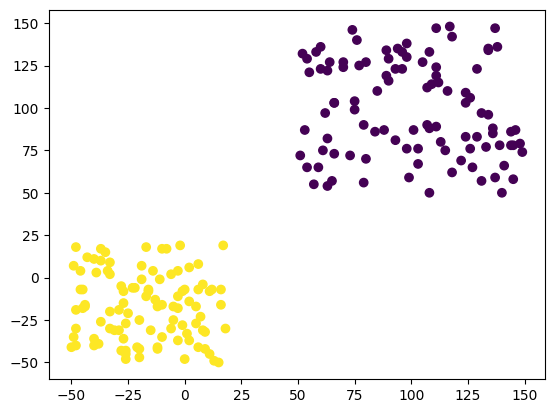

In [4]:
plt.scatter(dataset[:, 0], dataset[:, 1], c = label)

In [5]:
# dataset = np.hstack((label, dataset))train_X = X_data[:160, :]

In [6]:
import sklearn 
X_data, Y_data = sklearn.utils.shuffle(dataset, label, random_state=5)

In [10]:
Y_data = Y_data.reshape((-1, 1))

In [11]:
train_X = X_data[:160, :]
test_X = X_data[160:, :]
train_Y = Y_data[:160, :]
test_Y = Y_data[160:, :]

In [13]:
print(train_X.shape, test_X.shape, train_Y.shape, test_Y.shape)

(160, 2) (40, 2) (160, 1) (40, 1)


In [26]:
class KNN:
    
    def __init__(self, k):
        self.k = k
        
    def eucledian_distance(self, point1, point2):
        distance = ((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)**0.5
        return distance
    
    def fit(self, train_X, train_Y, X_test):
        distance = []
        
        for i in range(train_X.shape[0]):
            distance.append((self.eucledian_distance(X_test, train_X[i]), i))
#         print(distance)
        distance = sorted(distance)

        distance = distance[:self.k]
        
        classes = []
        
        for dist, i in distance:
            classes.append(train_Y[i])
            
        maj_class, count = np.unique(classes, return_counts=True)
        
        final_class = np.argmax(count)
        
        print(f"Prediction: {classes[final_class]} with confidence {np.max(count)/np.sum(count)}")

In [27]:
knn = KNN(7)

In [28]:
knn.fit(train_X, train_Y, test_X[0])

Prediction: [0] with confidence 1.0


In [29]:
x = np.array([1, 2, 3, 4, 5, 6, 1 , 3 , 6 , 2 , 2, 3 , 1, 2 , 1 , 1 , 0.5])

In [33]:
print(np.unique(x, return_counts=True))
unique, count = np.unique(x, return_counts=True)

(array([0.5, 1. , 2. , 3. , 4. , 5. , 6. ]), array([1, 5, 4, 3, 1, 1, 2], dtype=int64))


In [34]:
np.argmax(count)

1

In [35]:
unique[np.argmax(count)]

1.0